In [54]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(0)

import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '7'
sys.path.insert(0,'..')

import torch
import torch.nn as nn
import torch.nn.functional as F

from util import read_data_in_dense_matrix, eval_prediction, store_dense_matrix_to_submission, move_param_to_device
from our_methods import impute_by_DiscreteLabelCombined

data_dir = '../../data/'

In [55]:
(train_matrix, test_matrix), (is_train, is_test) = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=0.05)

In [63]:

reg = 0.00075
dim_embed = 5
prior_reg = 0

prediction, loss_monitor, param_list = impute_by_DiscreteLabelCombined(train_matrix, is_train, dim_embed=dim_embed, iters=3000, reg=reg, prior_reg=prior_reg)
train_rmse, test_rmse = eval_prediction(prediction, train_matrix, is_train), eval_prediction(prediction, test_matrix, is_test)
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")


Using: cuda
Train RMSE: 0.9299, Test RMSE: 0.9774


In [64]:

data_matrix, is_provided = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=None)
prediction, loss_monitor, param_list = impute_by_DiscreteLabelCombined(data_matrix, is_provided, dim_embed=dim_embed, iters=3000, reg=reg, prior_reg=prior_reg)
eval_prediction(prediction, data_matrix, is_provided)


Using: cuda


0.9376901187514441

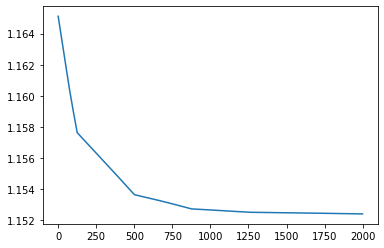

In [65]:
plt.plot(loss_monitor[1000:])

In [66]:
store_dense_matrix_to_submission(os.path.join(data_dir, 'sampleSubmission.csv'), os.path.join(data_dir, 'DLM.csv'), prediction)
